In [1]:
import sys
 
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '../')
import myTA
import numpy as np
import pandas as pd
import datetime as dt
import pickle
from patternsFinding import *

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


data analyzed
5 valid candles found, printing plots...
------------------------ validCandle: 29 ------------------------


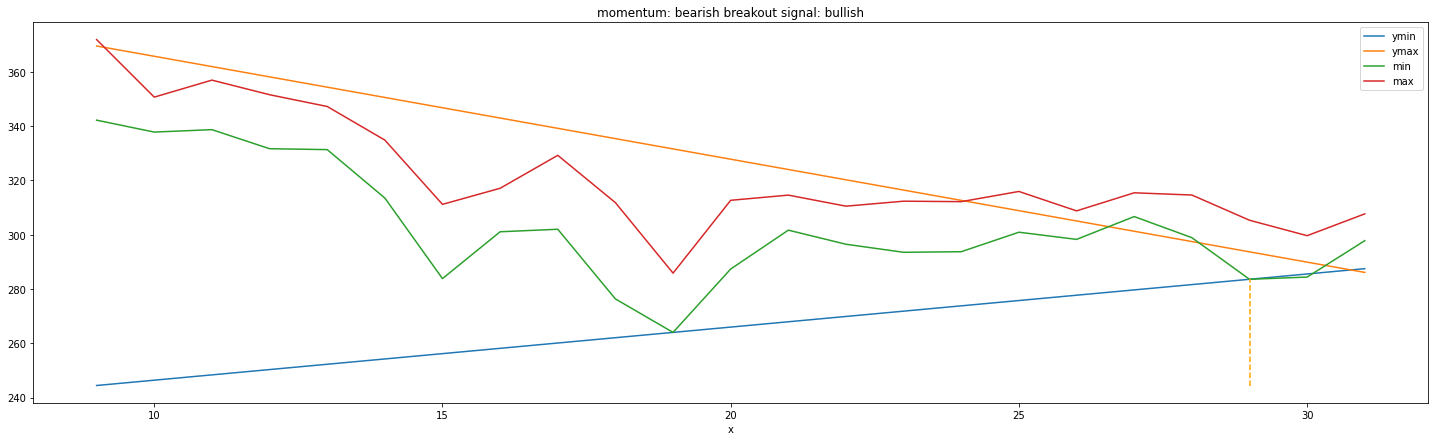

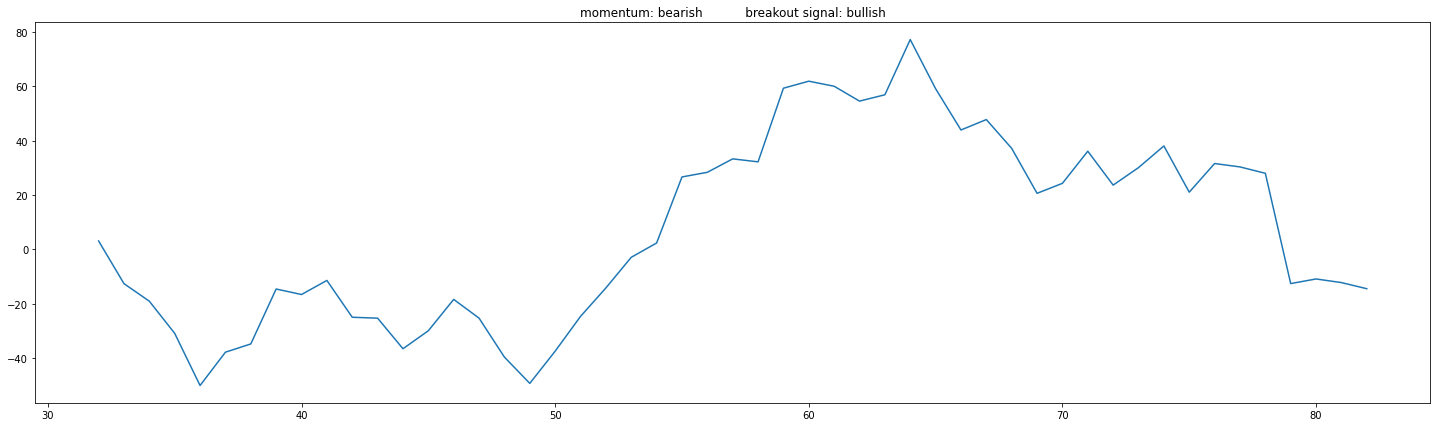

------------------------ validCandle: 32 ------------------------


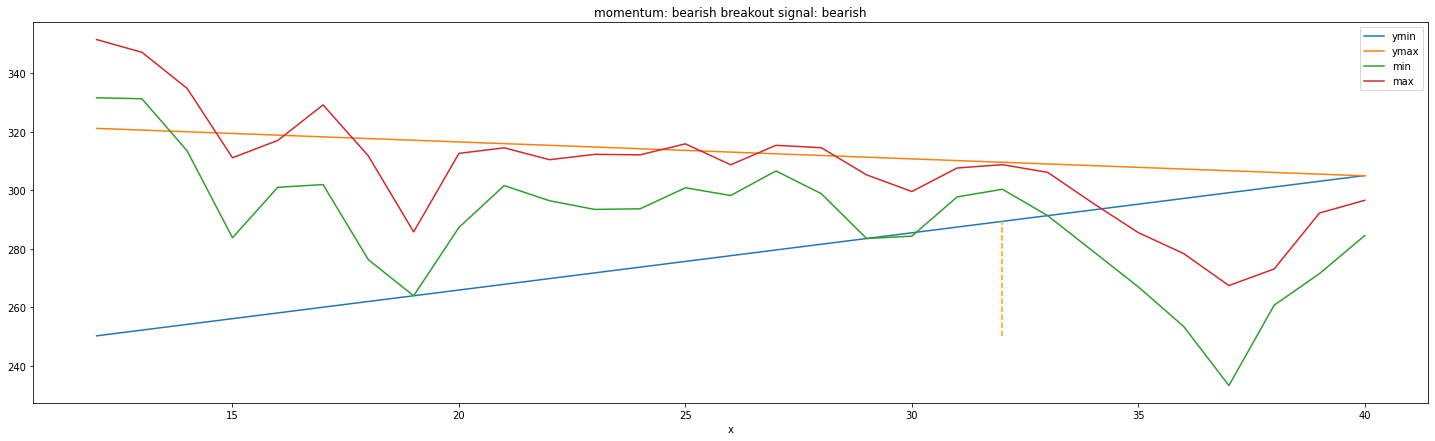

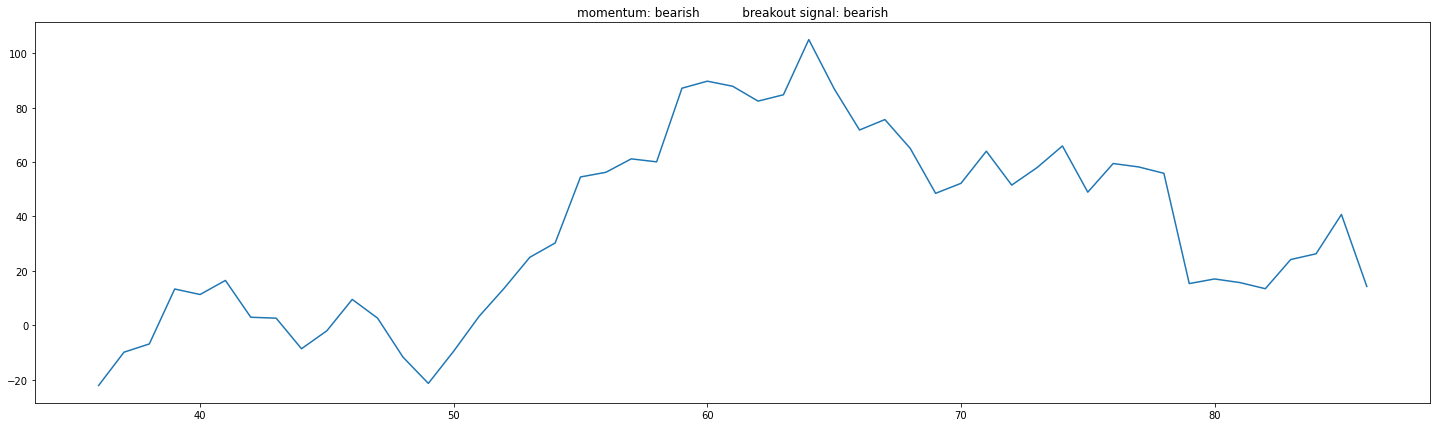

------------------------ validCandle: 50 ------------------------


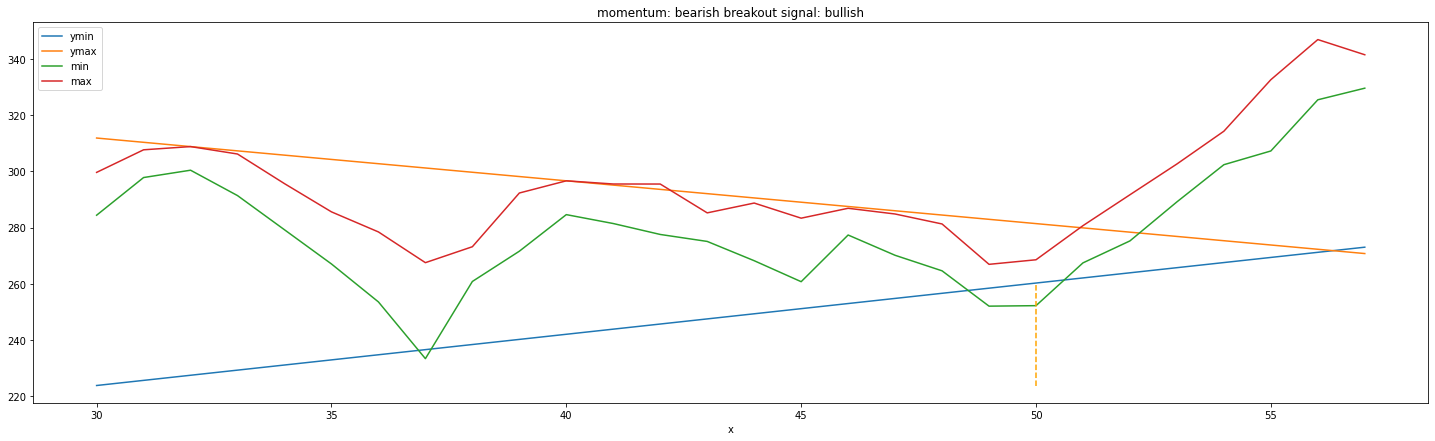

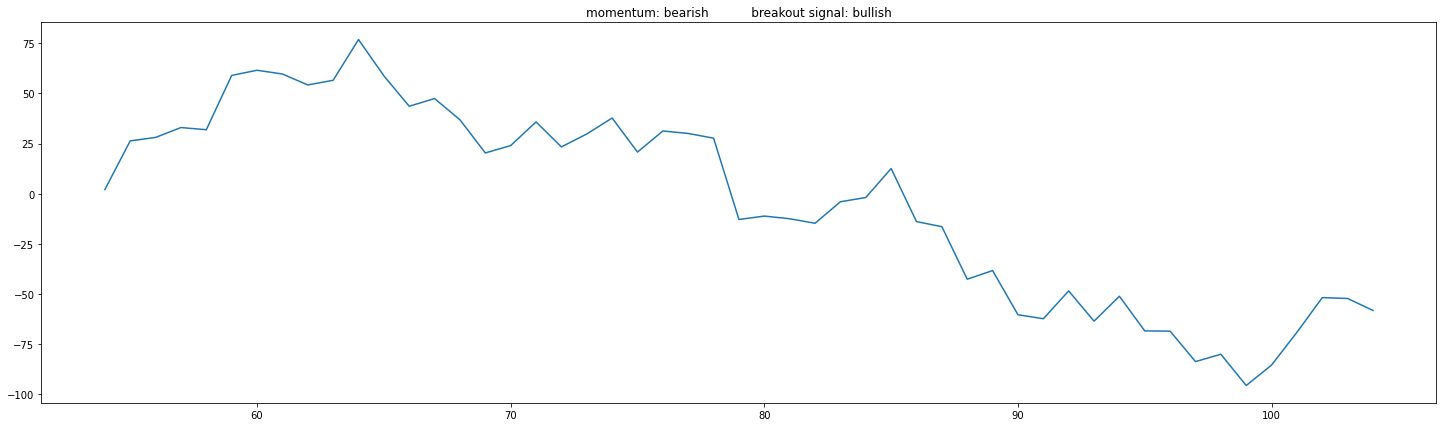

------------------------ validCandle: 129 ------------------------


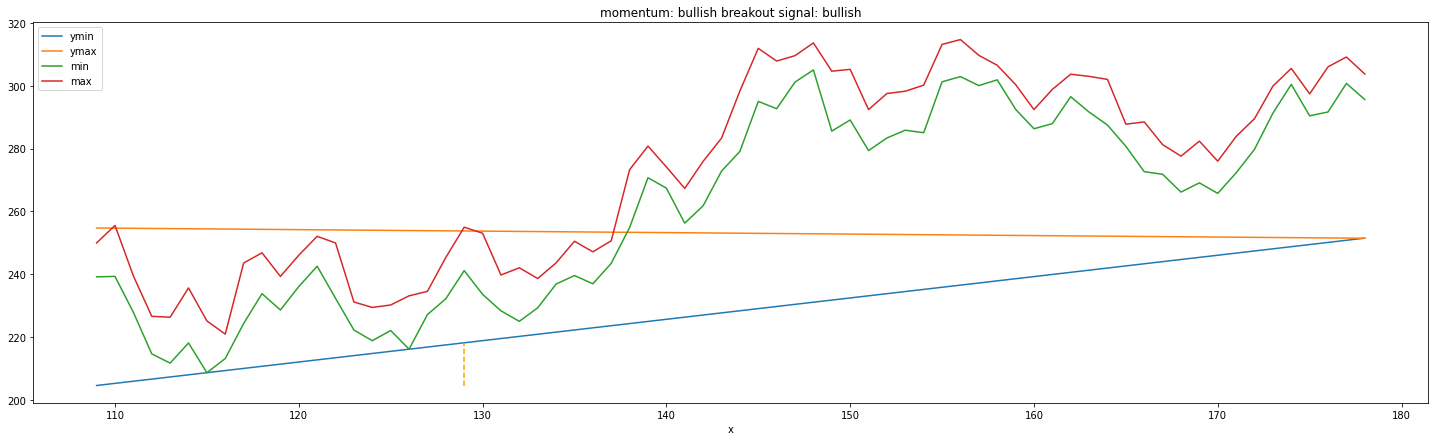

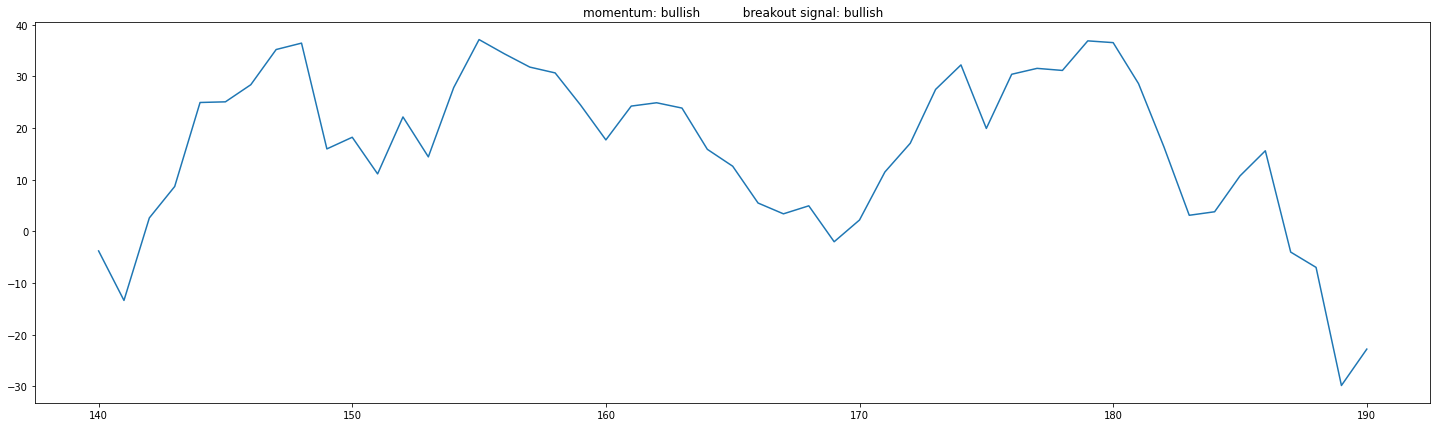

------------------------ validCandle: 162 ------------------------


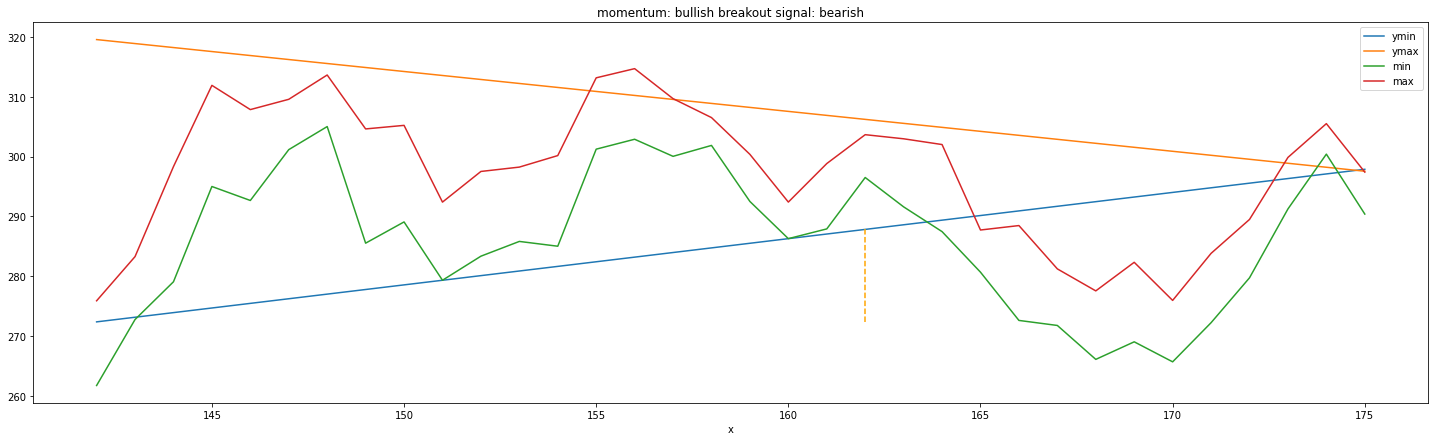

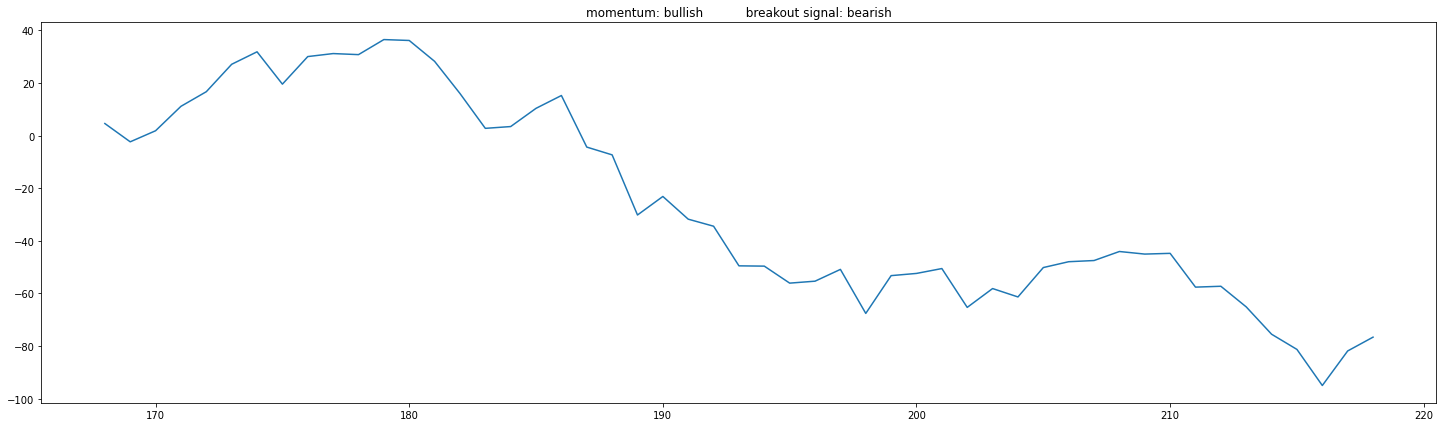

In [2]:
code='TSLA'
backcandles = 20
df = myTA.downloadAndMakeAnalysis(code, dt.datetime(2022,1,1), dt.datetime.now(),'1d').reset_index()
df['pivot'] = df.apply(lambda x: pivotid(df, x.name,3,3), axis=1)
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)
print("data analyzed")

warnings.filterwarnings("ignore")
validCandles = searchForValidCandles(df, backcandles=backcandles, minNoPoints=3, fitThreshold=0)
validCandles = np.array(validCandles)[np.diff(np.concatenate([[0], validCandles]))>1]
print(f"{len(validCandles)} valid candles found, printing plots...")
for validCandle in validCandles:
    print(f"------------------------ validCandle: {validCandle} ------------------------")
    triangle = visualizeValidCandle(df, validCandle, backcandles=backcandles)
    opportunity = Opportunity(df, triangle, validCandle, backcandles)
    opportunity.plotEverything()
warnings.filterwarnings("default")

In [2]:
backcandles = 20
tickers = pd.read_csv("../nasdaqTickers.csv")
patterns = pickle.load(open( "patterns.p", "rb"))
pickle.dump( patterns, open( f"E:/Datasets/Financial/PatternAnalysisBackup/symbolsPattersAnalysis{len(patterns)}.p", "wb" ) )

for i in range(3,30):
    code=tickers['Symbol'][i]
    try:
        df = myTA.downloadAndMakeAnalysis(code, dt.datetime(1980,1,1), dt.datetime.now(),'1d').reset_index()
        patterns = pd.concat([patterns,getPatterns(df, code, backcandles)])
        print(i, code, "done")
    except:
        print(f"failed for {code}")

pickle.dump( patterns, open( f"patterns.p", "wb" ) )

data analyzed
68 valid candles found, printing plots...
3 AACG done
data analyzed
5 valid candles found, printing plots...
4 AACI done
data analyzed
23 valid candles found, printing plots...
5 AADI done
data analyzed
102 valid candles found, printing plots...
6 AAIC done

1 Failed download:
- AAIC^B: No data found, symbol may be delisted
failed for AAIC^B

1 Failed download:
- AAIC^C: No data found, symbol may be delisted
failed for AAIC^C
data analyzed
8 valid candles found, printing plots...
9 AAIN done
data analyzed
34 valid candles found, printing plots...
10 AAL done

1 Failed download:
- AAM^A: No data found, symbol may be delisted
failed for AAM^A

1 Failed download:
- AAM^B: No data found, symbol may be delisted
failed for AAM^B
data analyzed
3 valid candles found, printing plots...
13 AAMC done
data analyzed
195 valid candles found, printing plots...
14 AAME done
data analyzed
8 valid candles found, printing plots...
15 AAN done
data analyzed
28 valid candles found, printing p

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_11132\140994705.py:15: ResourceWarning: unclosed file <_io.BufferedWriter name='patterns.p'>
  pickle.dump( patterns, open( f"patterns.p", "wb" ) )


In [106]:
patterns['code'].unique()

array(['A', 'AA', 'AAC'], dtype=object)

In [113]:
unique, counts = np.unique(tickers['Symbol'], return_counts=True)

TypeError: '<' not supported between instances of 'str' and 'float'

In [114]:
np.bincount(patterns['code'].unique())

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [5]:
patterns

,code,momentum,momentumChange%,breakOutSignal,returnsPercent
0,A,bullish,33.302921,bearish,"[0.551973219678936, 0.735964292905248, 0.18399..."
0,A,bearish,-24.112018,bearish,"[-7.755105523556908, -12.72109307902826, -16.1..."
0,A,bearish,-30.498524,bullish,"[-1.7060390231721432, -2.6246719747915392, -3...."
0,A,bullish,7.525509,bearish,"[-2.0382182740451187, -2.242038742737087, -1.2..."
0,A,bullish,13.58284,bullish,"[1.6981109293213472, 2.528309898553262, 2.9056..."
...,...,...,...,...,...
0,ABCM,bearish,-18.630977,bullish,"[-0.5946057811749528, 1.1333006669468026, 1.74..."
0,ABCM,bullish,2.05575,bullish,"[0.0, 0.19940636386983362, -3.0408709832648695..."
0,ABCM,bearish,-27.727267,bearish,"[5.37217402994809, 5.501614487306842, 7.961168..."
0,ABCM,bullish,7.016353,bearish,"[0.21817987615411932, -0.581817626953125, -2.8..."


In [27]:
patterns[(patterns['momentum']=='bullish') & (patterns['breakOutSignal']=='bullish')]['returnsPercent']

0    [1.6981109293213472, 2.528309898553262, 2.9056...
0    [-0.22159797690745364, -0.49861576051257156, 6...
0    [1.1066725444386283, 1.2603738767900743, -0.79...
0    [-0.7000236021270397, -0.5185347213282896, -0....
0    [-1.4363561420476165, -2.724121440624612, -2.3...
                           ...                        
0    [-0.8057055367996674, -0.48342332207980043, -0...
0    [-1.4667293764590088, 0.4597177825519022, 0.0,...
0    [-4.176517376762832, -3.1783532812509083, -0.2...
0    [0.10384453544128036, -1.5576383221392964, -1....
0    [0.0, 0.19940636386983362, -3.0408709832648695...
Name: returnsPercent, Length: 374, dtype: object

In [34]:
for i in range(len(patterns)):
    print(patterns.iloc[i]['returnsPercent']==np.inf)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[False False False False False False False False False False Fal

In [22]:
np.mean(patterns[(patterns['momentum']=='bullish') & (patterns['breakOutSignal']=='bullish')]['returnsPercent'], axis=0) == np.inf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

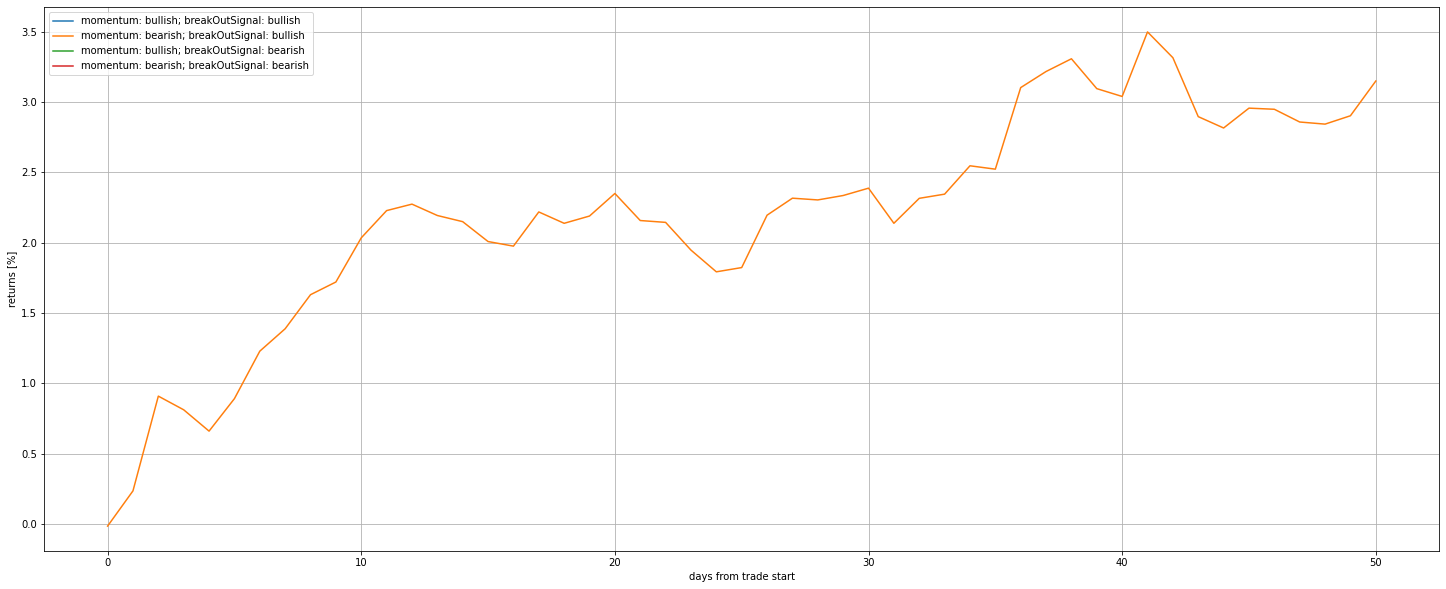

In [35]:
patterns['returnsPercent'] = [np.concatenate([x, [0 for _ in range(51-len(x))]]) for x in patterns['returnsPercent']]
plt.figure(figsize=(25,10))
plt.grid()
plt.plot(np.mean(patterns[(patterns['momentum']=='bullish') & (patterns['breakOutSignal']=='bullish')]['returnsPercent'], axis=0))
plt.plot(np.mean(patterns[(patterns['momentum']=='bearish') & (patterns['breakOutSignal']=='bullish')]['returnsPercent'], axis=0))
plt.plot(np.mean(patterns[(patterns['momentum']=='bullish') & (patterns['breakOutSignal']=='bearish')]['returnsPercent'], axis=0))
plt.plot(np.mean(patterns[(patterns['momentum']=='bearish') & (patterns['breakOutSignal']=='bearish')]['returnsPercent'], axis=0))

plt.legend([
'momentum: bullish; breakOutSignal: bullish',
'momentum: bearish; breakOutSignal: bullish',
'momentum: bullish; breakOutSignal: bearish',
'momentum: bearish; breakOutSignal: bearish'])

plt.xlabel('days from trade start')
plt.ylabel('returns [%]')
plt.show()